In [1]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [2]:
#initialize CNN model
model=Sequential()

In [3]:
#Add Convolutional Layer
model.add(Convolution2D(32,3,3,input_shape=(128,128,3),activation="relu"))

In [4]:
#Add Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,3,3,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2,)))
model.add(Convolution2D(32,3,3,activation="relu"))

In [5]:
#Add Flattening Layer
model.add(Flatten())

In [6]:
#Add Hidden Layer
model.add(Dense(256,kernel_initializer="uniform",activation="relu"))
model.add(Dense(128,kernel_initializer="uniform",activation="relu"))

In [7]:
#Add Output Layer
model.add(Dense(4,kernel_initializer="uniform",activation="relu"))

In [8]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
#training the data
x_train=train_datagen.flow_from_directory('C:/Users/91836/Documents/WBC Classification/data/train',
                                         target_size=(128,128),
                                         batch_size=32,
                                         class_mode='categorical')

Found 3840 images belonging to 4 classes.


In [12]:
#testing the data
x_test=test_datagen.flow_from_directory('C:/Users/91836/Documents/WBC Classification/data/test',
                                       target_size=(128,128),
                                       batch_size=32,
                                       class_mode='categorical')

Found 960 images belonging to 4 classes.


In [13]:
history=model.fit(x_train,
                         steps_per_epoch = 120,
                         epochs = 16,
                         validation_data = x_test,
                         validation_steps =30) 

model.save("projectWBC.h5")

Epoch 1/16
120/120 [==============================] - 64s 516ms/step - loss: 8.1702 - accuracy: 0.2552 - val_loss: 4.5435 - val_accuracy: 0.4812
Epoch 2/16
120/120 [==============================] - 68s 570ms/step - loss: 4.7365 - accuracy: 0.4256 - val_loss: 4.6330 - val_accuracy: 0.4333
Epoch 3/16
120/120 [==============================] - 69s 576ms/step - loss: 4.7138 - accuracy: 0.4555 - val_loss: 4.4675 - val_accuracy: 0.6323
Epoch 4/16
120/120 [==============================] - 65s 540ms/step - loss: 4.7743 - accuracy: 0.5126 - val_loss: 4.4503 - val_accuracy: 0.6021
Epoch 5/16
120/120 [==============================] - 58s 487ms/step - loss: 4.5248 - accuracy: 0.5910 - val_loss: 4.3528 - val_accuracy: 0.6906
Epoch 6/16
120/120 [==============================] - 56s 469ms/step - loss: 4.5396 - accuracy: 0.6321 - val_loss: 4.2968 - val_accuracy: 0.6781
Epoch 7/16
120/120 [==============================] - 55s 460ms/step - loss: 4.3209 - accuracy: 0.6651 - val_loss: 4.2149 - val_ac

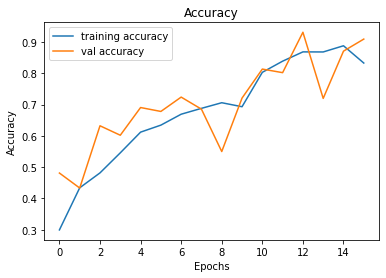

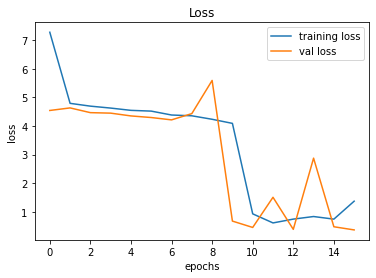

In [14]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()